## Project 3 - subsonic - supersonic


`Libraries`


In [1]:
import numpy as np
from utils import mac_cormac, generate_plots

`Constants`


In [2]:
Nx = 101
x = np.linspace(0, 3, Nx)
dx = x[1] - x[0]
gamma = 1.4
CFL = 0.5
R = 287.0

In [12]:
P = np.ones(Nx) 
T = np.ones(Nx)
rho = P / (R * T)
v = np.ones(Nx)
A = 1 + 2.2 * (x - 1.5)**2
Mach_no = np.ones(Nx)

In [13]:
Q1 = rho * A
Q2 = rho * A * v
Q3 = rho * A * (T / (gamma - 1) + (gamma / 2) * v ** 2)

In [14]:
def supersonicIBC():
    Q1[0] = rho[0] * A[0]
    Q2[0] = 2 * Q2[1] - Q2[2]
    Q3[0] = Q1[0] * (T[0] / (gamma - 1) + (gamma / 2) * v[0] ** 2)

    Q1[-1] = 2 * Q1[-2] - Q1[-3]
    Q2[-1] = 2 * Q2[-2] - Q2[-3]
    Q3[-1] = 2 * Q3[-2] - Q3[-3]


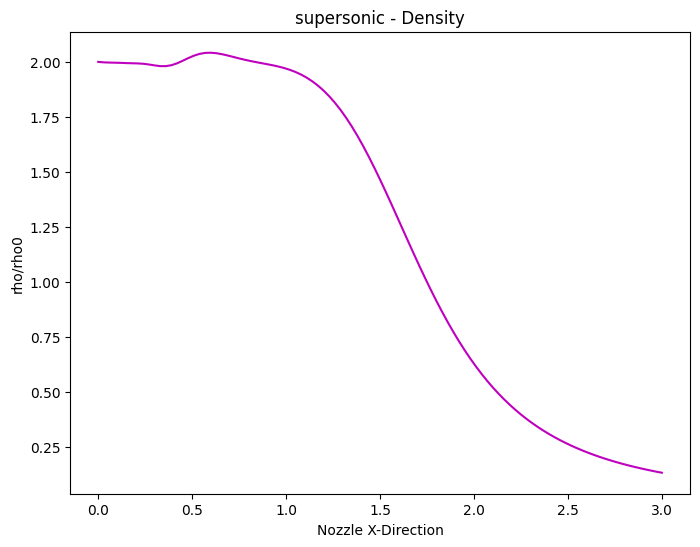

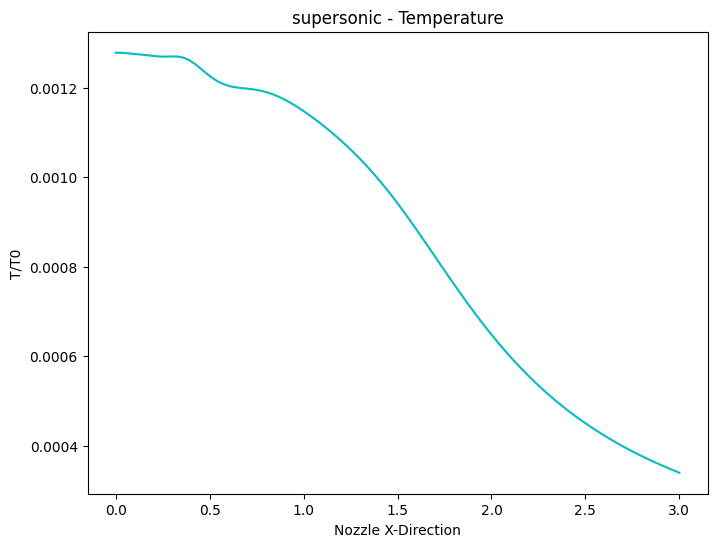

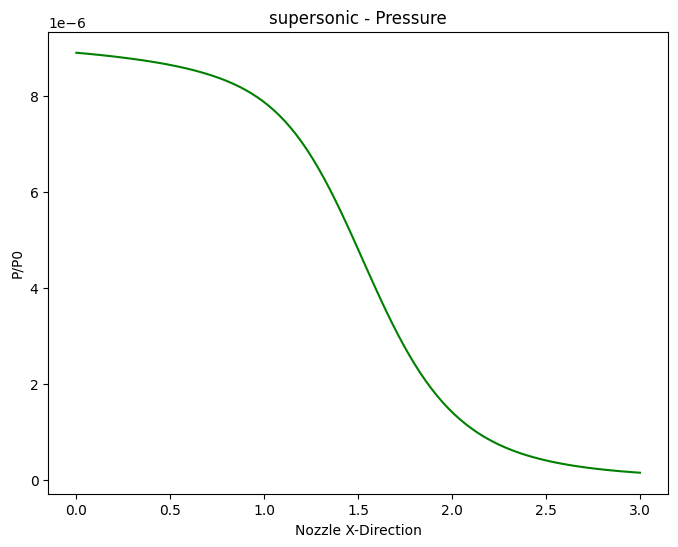

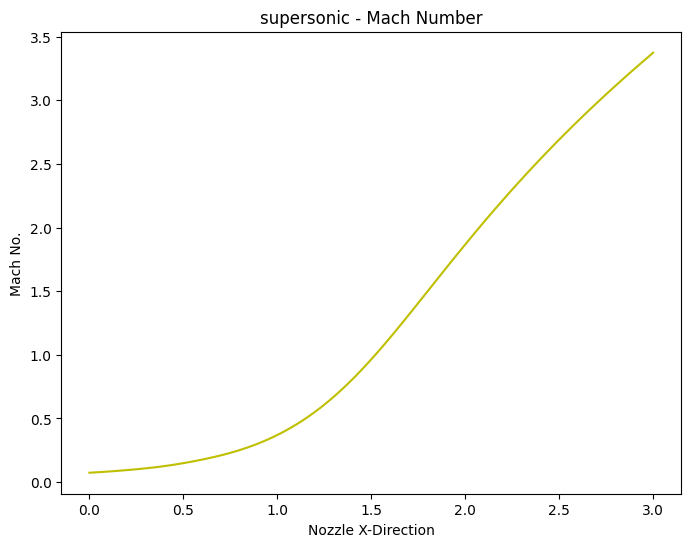

In [15]:
P, rho, v,T, Mach_no = mac_cormac(rho,A,v,T,Mach_no,P,Q1,Q2,Q3,gamma, CFL, Nx, dx, supersonicIBC)

generate_plots(P/500,x,rho/0.00174216,v,T/1000,Mach_no, "supersonic")